In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

# Is machine learning math a rocket science?! 

Any machine learning model consists off:
1. Model representation
2. Cost function (target function) 
3. optimization function

## Model representation: 

Assume the following:
1. We have a house size: $x$
2. a house price $y$
$$ x = \begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}$$

$$ y = \begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}$$



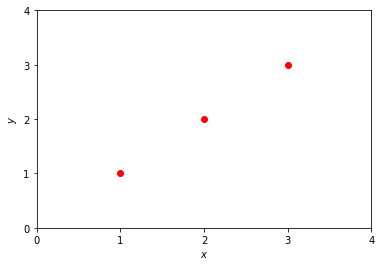

In [30]:
x = np.array([1,2,3])
y = np.array([1,2,3])
plt.plot(x,y,'ro')
plt.axis([0,4,0,4])
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

So what is a basic representation for this ??


$$ 
y = some\ coofficient * x \\
y = \beta * x $$

our predection as $f(x)$ so


$$ f(x) = \beta * x $$

# Cost function:


### let's invent our cost function:
$$ cost = f(x) - y $$

$$ = \sum_{i = 0}^n \big(\ f(x) - y \ \big)  $$

$$ = \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $$

$$ = \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $$

$$ = \dfrac{1}{n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $$

$$ = \dfrac{1}{2n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $$

so what is this? 

### Mean Square Error Cost Function

## Minimize the Cost:

Our model:   $$ f(x) = \beta + x $$

Our cost function:   $$ = \dfrac{1}{2n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $$

after substitution:   $$ \dfrac{1}{2n} \sum_{i = 0}^n \big(\ (\beta * x_i) - y_i \ \big) ^ 2 $$

$$ \dfrac{1}{2n} \sum_{i = 0}^n \big(\ (\beta * x_i) - y_i \ \big) ^ 2 $$

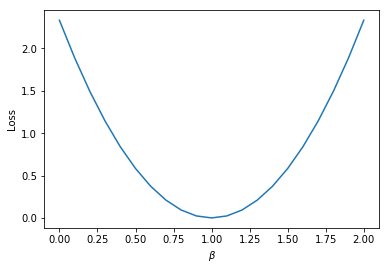

In [31]:
beta = np.arange(0,2.1,0.1)
def cost(y, y_hat):
    n = len(y)
    return (((y_hat - y)**2).sum()) / (2 * n)

beta_applied = np.array([a*b for a,b in zip(beta,np.array([x,]*len(beta)))])
loss = [cost(y, y_hat) for y_hat in beta_applied]
plt.plot(beta,loss)
plt.xlabel(r'$\beta$')
plt.ylabel('Loss')

So again how to formalize that $\beta$ should be 1

how to search for the best $\beta$?

how to minimize the cost function using $\beta$?

$\underset{\beta}{\operatorname{argmin}} \dfrac{1}{2n} \sum_{i = 0}^n \big(\ (\beta * x_i) - y_i \ \big) ^ 2 $

## derivative ( Gradient )

In [32]:
display_gif("https://upload.wikimedia.org/wikipedia/commons/2/2d/Tangent_function_animation.gif")

what is derivative?

the $\textbf{slope}$ of the $\textbf{tangent line}$ to the graph of the function

What is $\textbf{tangent line}$? 

is the best linear approximation of the function near the input value. 

What is $\textbf{slope}$? 

1. describes the direction 
    1. if it is increasing then the slope is positive
    2. if it is decreasing then the slope is negative
2. describes the steepness 

## What is Gradient Parameters descent? 
Simply it is updating the $\beta$ or $\textbf{Model Parameters}$ values in the direction of the global minima using derivatives (gradient) 


$$\beta_{new} = \beta_{old}\ \textbf{-}\ \eta \dfrac{df}{d\beta}$$

$$ \dfrac{df}{d\beta} = \dfrac{1}{N} \sum_{i = 0}^n x_i (\beta x_i - y_i) $$



In [33]:
def gradient_step(x, y, beta, learning_rate):
    N = len(x)
    diff = 1/N * np.sum( x * ((beta * x) - y))
    return beta - (learning_rate * diff)

[2, 0.60000000000000031, 1.1599999999999997, 0.93600000000000017, 1.0255999999999998, 0.98976000000000008, 1.0040959999999999, 0.99836159999999996, 1.0006553600000001, 0.99973785599999998, 1.0001048576]


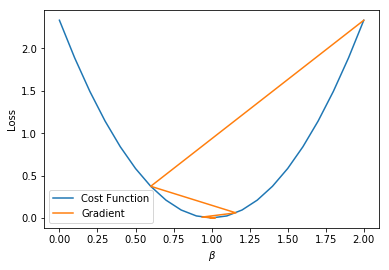

In [34]:
eta = 0.3
number_of_function_calls = 10

betas = [2]
for i in range(number_of_function_calls):
    betas.append(gradient_step(x, y, betas[i], eta)) 
    
beta_p_applied = np.array([a*b for a,b in zip(betas,np.array([x,]*len(betas)))])
loss_p = [cost(y, y_hat) for y_hat in beta_p_applied]
print(betas)
plt.plot(beta,loss)
plt.plot(betas, loss_p,'-')
plt.xlabel(r'$\beta$')
plt.ylabel('Loss')
plt.legend(['Cost Function','Gradient'])